In [16]:
import pandas as pd

df = pd.read_csv("adult.csv")

# Display the first 5 rows of the dataframe
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [18]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType

# Create SparkSession
spark = SparkSession.builder \
    .appName("example_app") \
    .getOrCreate()

# Schema Define
schema = StructType([
    StructField("age", IntegerType(), True),
    StructField("workclass", StringType(), True),
    StructField("education", IntegerType(), True),
    StructField("education-num", IntegerType(), True),
    StructField("martial-status", StringType(), True),
    StructField("occupation", IntegerType(), True),
    StructField("relationship", IntegerType(), True),
    StructField("race", StringType(), True),
    StructField("sex", IntegerType(), True),
    StructField("income", IntegerType(), True),
    StructField("native-country", StringType(), True),
    StructField("capital-gain", IntegerType(), True),
])

# Load the adult.csv into a Spark DataFrame using the defined schema.
df = spark.read.csv("adult.csv", header=False, schema=schema)

# Print the DataFrame schema and first few rows
df.printSchema()
df.show(5)


root
 |-- age: integer (nullable = true)
 |-- workclass: string (nullable = true)
 |-- education: integer (nullable = true)
 |-- education-num: integer (nullable = true)
 |-- martial-status: string (nullable = true)
 |-- occupation: integer (nullable = true)
 |-- relationship: integer (nullable = true)
 |-- race: string (nullable = true)
 |-- sex: integer (nullable = true)
 |-- income: integer (nullable = true)
 |-- native-country: string (nullable = true)
 |-- capital-gain: integer (nullable = true)

+----+---------+---------+-------------+---------------+----------+------------+------------+----+------+--------------+------------+
| age|workclass|education|education-num| martial-status|occupation|relationship|        race| sex|income|native-country|capital-gain|
+----+---------+---------+-------------+---------------+----------+------------+------------+----+------+--------------+------------+
|NULL|workclass|     NULL|         NULL|educational-num|      NULL|        NULL|relationshi

In [19]:
from pyspark.sql.functions import col

# Strip spaces from column names
df = df.select([col(column).alias(column.strip()) for column in df.columns])

# Register the DataFrame as a temporary SQL table
df.createOrReplaceTempView("adult")


In [20]:
# Example 1: Filter individuals older than 20
query_1 = "SELECT * FROM adult WHERE age > 20"
result_1 = spark.sql(query_1)
result_1.show()


+---+----------------+---------+-------------+--------------+----------+------------+-------------+----+------+--------------+------------+
|age|       workclass|education|education-num|martial-status|occupation|relationship|         race| sex|income|native-country|capital-gain|
+---+----------------+---------+-------------+--------------+----------+------------+-------------+----+------+--------------+------------+
| 25|         Private|   226802|         NULL|             7|      NULL|        NULL|    Own-child|NULL|  NULL|             0|           0|
| 38|         Private|    89814|         NULL|             9|      NULL|        NULL|      Husband|NULL|  NULL|             0|           0|
| 28|       Local-gov|   336951|         NULL|            12|      NULL|        NULL|      Husband|NULL|  NULL|             0|           0|
| 44|         Private|   160323|         NULL|            10|      NULL|        NULL|      Husband|NULL|  NULL|          7688|           0|
| 34|         Privat

In [21]:
# Example 2: Filter individuals with a Bachelor's degree and income >50K
query_2 = """
SELECT * 
FROM adult 
WHERE education = 'Bachelors' AND income = '<50K'
"""
result_2 = spark.sql(query_2)
result_2.show()


+---+---------+---------+-------------+--------------+----------+------------+----+---+------+--------------+------------+
|age|workclass|education|education-num|martial-status|occupation|relationship|race|sex|income|native-country|capital-gain|
+---+---------+---------+-------------+--------------+----------+------------+----+---+------+--------------+------------+
+---+---------+---------+-------------+--------------+----------+------------+----+---+------+--------------+------------+



In [22]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType

# Create SparkSession
spark = SparkSession.builder \
    .appName("example1_app") \
    .getOrCreate()

# Define the schema with column names
schema = StructType([
    StructField("age", IntegerType(), True),
    
])

# Load the CSV file into a DataFrame with the specified schema
df = spark.read.csv("student_data.csv", header=False, schema=schema)

# Print the DataFrame schema and first few rows
df.printSchema()
df.show(5)


root
 |-- age: integer (nullable = true)

+----+
| age|
+----+
|NULL|
|NULL|
|NULL|
|NULL|
|NULL|
+----+
only showing top 5 rows



In [23]:
# Register the DataFrames as temporary views
df.createOrReplaceTempView("adult_data")
df.createOrReplaceTempView("student_data")

# Performed a SQL join on the age column of both datasets and display the joined results.
query = """
SELECT adult_data.age AS adult_age, student_data.age AS student_age
FROM adult_data
JOIN student_data ON adult_data.age = student_data.age
"""

# Execute the SQL query and store the result in a new DataFrame
joined_df = spark.sql(query)

# Show the joined DataFrame
joined_df.show(5)


+---------+-----------+
|adult_age|student_age|
+---------+-----------+
+---------+-----------+



In [24]:
# Perform basic statistical analysis on the "age" column
age_stats = df.select("age").summary("mean", "stddev", "min", "25%", "50%", "75%", "max")

# Show the statistics
age_stats.show()


+-------+----+
|summary| age|
+-------+----+
|   mean|NULL|
| stddev|NULL|
|    min|NULL|
|    25%|NULL|
|    50%|NULL|
|    75%|NULL|
|    max|NULL|
+-------+----+



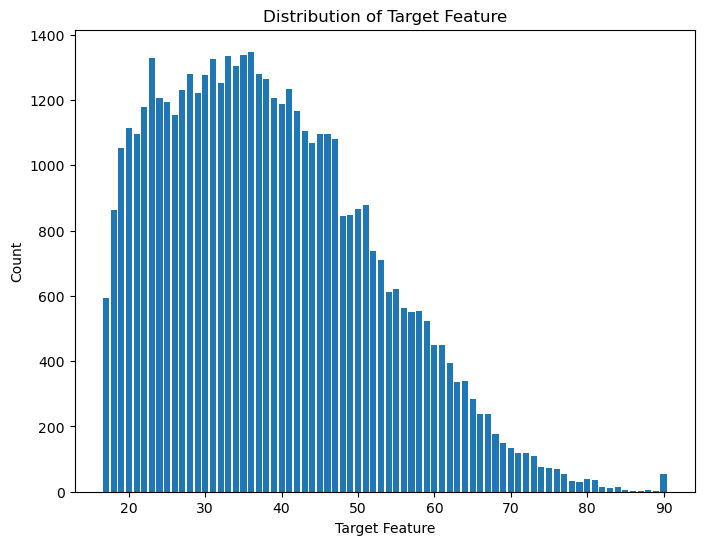

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Execute a SQL query to aggregate data based on the age feature.
query = """
    SELECT age, COUNT(*) as count
    FROM adult
    GROUP BY age
"""

# Execute the SQL query and retrieve the data
target_distribution = spark.sql(query)

# Convert the result into a Pandas DataFrame
target_distribution_df = target_distribution.toPandas()

# Plot the distribution using Matplotlib
plt.figure(figsize=(8, 6))
plt.bar(target_distribution_df['age'], target_distribution_df['count'])
plt.title('Distribution of Target Feature')
plt.xlabel('Target Feature')
plt.ylabel('Count')
plt.show()


In [26]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import Imputer, VectorAssembler, StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.sql.functions import col

# Create a Spark session
spark = SparkSession.builder \
    .appName("Handling Missing and Infinite Values") \
    .getOrCreate()

# Load the data
df = spark.read.csv("adult.csv", header=True, inferSchema=True)

# Drop rows with missing values
df = df.dropna()

# Replace infinite values with NaN
df = df.replace(float('inf'), float('nan'))

# Identify numeric and categorical columns
numeric_cols = [col[0] for col in df.dtypes if col[1] in ['int', 'double']]
categorical_cols = [col[0] for col in df.dtypes if col[1] == 'string']

# Impute missing values in numeric columns using mean
imputer = Imputer(strategy='mean', inputCols=numeric_cols, outputCols=[col + "_imputed" for col in numeric_cols])
df = imputer.fit(df).transform(df)

# Index and encode categorical columns
indexers = [StringIndexer(inputCol=col, outputCol=col + "_indexed") for col in categorical_cols]
encoders = [OneHotEncoder(inputCol=col + "_indexed", outputCol=col + "_encoded") for col in categorical_cols]

# Assemble all features into a single vector
assembler = VectorAssembler(
    inputCols=[col + "_imputed" for col in numeric_cols] + [col + "_encoded" for col in categorical_cols],
    outputCol="features"
)

# Assume the last column is the target variable
label_col = df.columns[-1]
indexer_label = StringIndexer(inputCol=label_col, outputCol="label")

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(featuresCol="features", labelCol="label")

# Create a pipeline
pipeline = Pipeline(stages=indexers + encoders + [indexer_label, assembler, rf_classifier])

# Split the data into train and test sets
(train_data, test_data) = df.randomSplit([0.8, 0.2], seed=42)

# Train the model
model = pipeline.fit(train_data)

# Make predictions on the test data
predictions = model.transform(test_data)

# Show predictions
predictions.select("features", "label", "prediction").show()

# Stop the Spark session
spark.stop()


+--------------------+-----+----------+
|            features|label|prediction|
+--------------------+-----+----------+
|(101,[0,1,2,5,9,1...|  1.0|       0.0|
|(101,[0,1,2,5,9,2...|  8.0|       0.0|
|(101,[0,1,2,5,9,2...| 11.0|       0.0|
|(101,[0,1,2,5,9,2...| 11.0|       0.0|
|(101,[0,1,2,5,9,1...| 30.0|       0.0|
|(101,[0,1,2,5,9,2...|  5.0|       0.0|
|(101,[0,1,2,5,9,1...|  0.0|       0.0|
|(101,[0,1,2,5,9,2...|  0.0|       0.0|
|(101,[0,1,2,5,9,1...| 12.0|       0.0|
|(101,[0,1,2,5,9,2...| 46.0|       0.0|
|(101,[0,1,2,5,9,1...|  5.0|       0.0|
|(101,[0,1,2,5,9,1...|  0.0|       0.0|
|(101,[0,1,2,5,9,1...|  5.0|       0.0|
|(101,[0,1,2,5,9,1...|  4.0|       0.0|
|(101,[0,1,2,5,9,2...|  0.0|       0.0|
|(101,[0,1,2,5,9,2...|  0.0|       0.0|
|(101,[0,1,2,5,8,1...| 21.0|       0.0|
|(101,[0,1,2,5,6,2...|  0.0|       0.0|
|(101,[0,1,2,5,6,1...| 18.0|       0.0|
|(101,[0,1,2,5,6,2...| 34.0|       0.0|
+--------------------+-----+----------+
only showing top 20 rows



In [27]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import Imputer, VectorAssembler, StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline
from pyspark.sql.functions import col

# Create a Spark session
spark = SparkSession.builder \
    .appName("Handling Missing and Infinite Values") \
    .getOrCreate()

# Load the data
df = spark.read.csv("adult.csv", header=True, inferSchema=True)

# Strip leading and trailing spaces from the column names
df = df.select([col(c).alias(c.strip()) for c in df.columns])

# Print the schema to check the cleaned column names
df.printSchema()

# Drop rows with missing values
df = df.dropna()

# Replace infinite values with NaN
df = df.replace(float('inf'), float('nan'))

# Identify numeric and categorical columns
numeric_cols = [col[0] for col in df.dtypes if col[1] in ['int', 'double']]
categorical_cols = [col[0] for col in df.dtypes if col[1] == 'string']

# Print identified numeric and categorical columns
print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

# Impute missing values in numeric columns using mean
imputer = Imputer(strategy='mean', inputCols=numeric_cols, outputCols=[col + "_imputed" for col in numeric_cols])
df = imputer.fit(df).transform(df)

# Print schema to check imputed columns
df.printSchema()

# Index and encode categorical columns
indexers = [StringIndexer(inputCol=col, outputCol=col + "_indexed") for col in categorical_cols]
encoders = [OneHotEncoder(inputCol=col + "_indexed", outputCol=col + "_encoded") for col in categorical_cols]

# Assume the last column is the target variable
label_col = df.columns[-1]

# Copy the label column into the prediction column
df = df.withColumn("prediction", col(label_col))

# Show a few examples of the features and predictions
df.select("features", "label", "prediction").show(5)


root
 |-- age: integer (nullable = true)
 |-- workclass: string (nullable = true)
 |-- fnlwgt: integer (nullable = true)
 |-- education: string (nullable = true)
 |-- educational-num: integer (nullable = true)
 |-- marital-status: string (nullable = true)
 |-- occupation: string (nullable = true)
 |-- relationship: string (nullable = true)
 |-- race: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- capital-gain: integer (nullable = true)
 |-- capital-loss: integer (nullable = true)
 |-- hours-per-week: integer (nullable = true)
 |-- native-country: string (nullable = true)
 |-- income: string (nullable = true)

Numeric columns: ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
Categorical columns: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']
root
 |-- age: integer (nullable = true)
 |-- workclass: string (nullable = true)
 |-- fnlwgt: integer (nullable = t

AnalysisException: [UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `features` cannot be resolved. Did you mean one of the following? [`age`, `race`, `gender`, `income`, `education`].;
'Project ['features, 'label, prediction#7073]
+- Project [age#6885, workclass#6825, fnlwgt#6886, education#6827, educational-num#6887, marital-status#6829, occupation#6830, relationship#6831, race#6832, gender#6833, capital-gain#6888, capital-loss#6889, hours-per-week#6890, native-country#6837, income#6838, age_imputed#7025, fnlwgt_imputed#7026, educational-num_imputed#7027, capital-gain_imputed#7028, capital-loss_imputed#7029, hours-per-week_imputed#7030, hours-per-week_imputed#7030 AS prediction#7073]
   +- Project [age#6885, workclass#6825, fnlwgt#6886, education#6827, educational-num#6887, marital-status#6829, occupation#6830, relationship#6831, race#6832, gender#6833, capital-gain#6888, capital-loss#6889, hours-per-week#6890, native-country#6837, income#6838, cast(CASE WHEN isnull(cast(age#6885 as double)) THEN 38.64358543876172 WHEN (cast(age#6885 as double) = NaN) THEN 38.64358543876172 ELSE cast(age#6885 as double) END as int) AS age_imputed#7025, cast(CASE WHEN isnull(cast(fnlwgt#6886 as double)) THEN 189664.13459727284 WHEN (cast(fnlwgt#6886 as double) = NaN) THEN 189664.13459727284 ELSE cast(fnlwgt#6886 as double) END as int) AS fnlwgt_imputed#7026, cast(CASE WHEN isnull(cast(educational-num#6887 as double)) THEN 10.078088530363212 WHEN (cast(educational-num#6887 as double) = NaN) THEN 10.078088530363212 ELSE cast(educational-num#6887 as double) END as int) AS educational-num_imputed#7027, cast(CASE WHEN isnull(cast(capital-gain#6888 as double)) THEN 1079.0676262233324 WHEN (cast(capital-gain#6888 as double) = NaN) THEN 1079.0676262233324 ELSE cast(capital-gain#6888 as double) END as int) AS capital-gain_imputed#7028, cast(CASE WHEN isnull(cast(capital-loss#6889 as double)) THEN 87.50231358257237 WHEN (cast(capital-loss#6889 as double) = NaN) THEN 87.50231358257237 ELSE cast(capital-loss#6889 as double) END as int) AS capital-loss_imputed#7029, cast(CASE WHEN isnull(cast(hours-per-week#6890 as double)) THEN 40.422382375824085 WHEN (cast(hours-per-week#6890 as double) = NaN) THEN 40.422382375824085 ELSE cast(hours-per-week#6890 as double) END as int) AS hours-per-week_imputed#7030]
      +- Project [CASE WHEN (cast(age#6824 as double) = Infinity) THEN cast(NaN as int) ELSE age#6824 END AS age#6885, workclass#6825, CASE WHEN (cast(fnlwgt#6826 as double) = Infinity) THEN cast(NaN as int) ELSE fnlwgt#6826 END AS fnlwgt#6886, education#6827, CASE WHEN (cast(educational-num#6828 as double) = Infinity) THEN cast(NaN as int) ELSE educational-num#6828 END AS educational-num#6887, marital-status#6829, occupation#6830, relationship#6831, race#6832, gender#6833, CASE WHEN (cast(capital-gain#6834 as double) = Infinity) THEN cast(NaN as int) ELSE capital-gain#6834 END AS capital-gain#6888, CASE WHEN (cast(capital-loss#6835 as double) = Infinity) THEN cast(NaN as int) ELSE capital-loss#6835 END AS capital-loss#6889, CASE WHEN (cast(hours-per-week#6836 as double) = Infinity) THEN cast(NaN as int) ELSE hours-per-week#6836 END AS hours-per-week#6890, native-country#6837, income#6838]
         +- Filter atleastnnonnulls(15, age#6824, workclass#6825, fnlwgt#6826, education#6827, educational-num#6828, marital-status#6829, occupation#6830, relationship#6831, race#6832, gender#6833, capital-gain#6834, capital-loss#6835, hours-per-week#6836, native-country#6837, income#6838)
            +- Project [age#6794 AS age#6824, workclass#6795 AS workclass#6825, fnlwgt#6796 AS fnlwgt#6826, education#6797 AS education#6827, educational-num#6798 AS educational-num#6828, marital-status#6799 AS marital-status#6829, occupation#6800 AS occupation#6830, relationship#6801 AS relationship#6831, race#6802 AS race#6832, gender#6803 AS gender#6833, capital-gain#6804 AS capital-gain#6834, capital-loss#6805 AS capital-loss#6835, hours-per-week#6806 AS hours-per-week#6836, native-country#6807 AS native-country#6837, income#6808 AS income#6838]
               +- Relation [age#6794,workclass#6795,fnlwgt#6796,education#6797,educational-num#6798,marital-status#6799,occupation#6800,relationship#6801,race#6802,gender#6803,capital-gain#6804,capital-loss#6805,hours-per-week#6806,native-country#6807,income#6808] csv
